<a href="https://colab.research.google.com/github/pramit46/LLMTry/blob/main/RAG/WT_RnD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
df=pd.read_csv("/content/final_csv_all.csv")

In [50]:
#df=df.drop(['summerized_review', 'reviews_text','reference','plus_code', 'place_id', 'website', 'url', 'wheelchair_accessible_entrance', 'geometry'], axis=1)
df=df.drop(df.columns[0], axis=1)
#df.head()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            32 non-null     object 
 1   business_status                 32 non-null     object 
 2   formatted_address               32 non-null     object 
 3   formatted_phone_number          23 non-null     object 
 4   international_phone_number      23 non-null     object 
 5   place_id                        32 non-null     object 
 6   plus_code                       31 non-null     object 
 7   rating                          32 non-null     float64
 8   reference                       32 non-null     object 
 9   service_type                    32 non-null     object 
 10  url                             32 non-null     object 
 11  user_ratings_total              32 non-null     int64  
 12  wheelchair_accessible_entrance  5 non-

In [52]:
df.isnull().sum()

,0
name,0
business_status,0
formatted_address,0
formatted_phone_number,9
international_phone_number,9
place_id,0
plus_code,1
rating,0
reference,0
service_type,0


In [46]:
df.rename(columns={'reviews_text':'x'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            32 non-null     object 
 1   business_status                 32 non-null     object 
 2   formatted_address               32 non-null     object 
 3   formatted_phone_number          23 non-null     object 
 4   international_phone_number      23 non-null     object 
 5   place_id                        32 non-null     object 
 6   plus_code                       31 non-null     object 
 7   rating                          32 non-null     float64
 8   reference                       32 non-null     object 
 9   service_type                    32 non-null     object 
 10  url                             32 non-null     object 
 11  user_ratings_total              32 non-null     int64  
 12  wheelchair_accessible_entrance  5 non-

In [24]:
final_df=df[['name','formatted_address','rating','user_ratings_total','very_negative','negative','neutral', 'positive', 'very_positive', 'Important_keys']].copy()
final_df['weighted_rating'] = final_df['rating'] * final_df['user_ratings_total']
final_df['max_sentiment_score'] = final_df[['very_negative','negative','neutral','positive','very_positive']].max(axis='columns')
final_df['max_sentiment_type'] = final_df[['very_negative','negative','neutral','positive','very_positive']].idxmax(axis='columns')


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 32 non-null     object 
 1   formatted_address    32 non-null     object 
 2   rating               32 non-null     float64
 3   user_ratings_total   32 non-null     int64  
 4   very_negative        32 non-null     float64
 5   negative             32 non-null     float64
 6   neutral              32 non-null     float64
 7   positive             32 non-null     float64
 8   very_positive        32 non-null     float64
 9   Important_keys       32 non-null     object 
 10  weighted_rating      32 non-null     float64
 11  max_sentiment_score  32 non-null     float64
 12  max_sentiment_type   32 non-null     object 
dtypes: float64(8), int64(1), object(4)
memory usage: 3.4+ KB


In [28]:
# Print categorical columns
categ_cols = [col for col in final_df.columns if final_df[col].dtype == 'object']
categ_cols

['name', 'formatted_address', 'Important_keys', 'max_sentiment_type']

In [33]:
# Print numerical columns
numb_cols = [col for col in final_df.columns if final_df[col].dtype == 'int64']
float_cols = [col for col in final_df.columns if final_df[col].dtype == 'float64']
print(f"{numb_cols} are integer values \nand \n{float_cols} are float values")

['user_ratings_total'] are integer values 
and 
['rating', 'very_negative', 'negative', 'neutral', 'positive', 'very_positive', 'weighted_rating', 'max_sentiment_score'] are float values


In [61]:
from IPython.core.display import display, HTML
def display_output(title, data):
    """Display the output in a styled box."""
    data_str = data.to_string()
    styled_output = f"""
    <div style="background-color: #f0f8fe; border: 2px solid #4682B4; padding: 10px; border-radius: 5px; color: #2f4f4e;">
        <h3>{title}</h3>
        <pre>{data_str}</pre>
    </div>
    """
    display(HTML(styled_output))

In [62]:
display_output("Analysis of Important Keys", df['Important_keys'].describe())

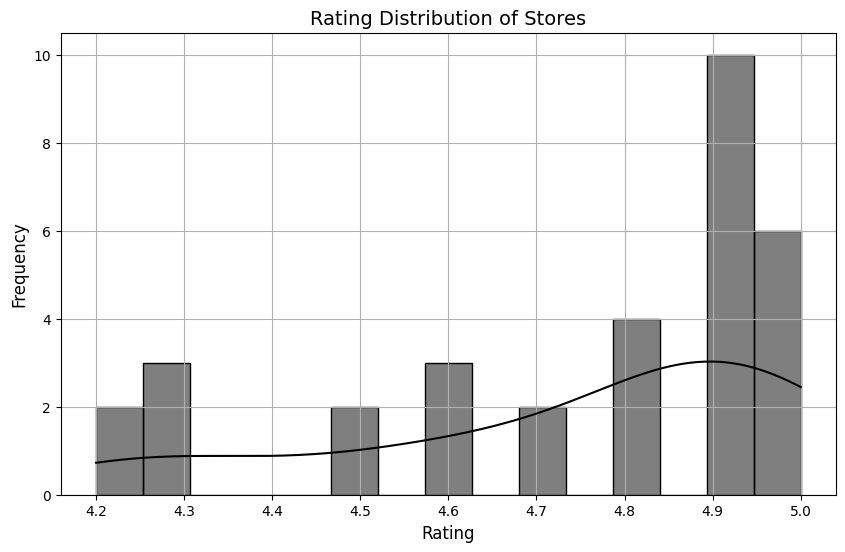

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


# Pallete
palette = ['Black', '#b379ef']
color_palette = sns.color_palette(palette)

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), bins=15, kde=True, color=palette[0])
plt.title('Rating Distribution of Stores', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
!pip install -q pinecone
!pip install -q llama_index
!pip install -q llama-index-vector-stores-pinecone

In [ ]:
from statistics import mean
final_df['mean_sentiment_score'] = final_df[['very_negative','negative','neutral', 'positive', 'very_positive']].mean(axis=1).round(5)

In [ ]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.vector_stores.pinecone import PineconeVectorStore
import pinecone

In [ ]:
from pinecone import Pinecone, ServerlessSpec
from google.colab import userdata

pc = Pinecone(api_key=userdata.get('pinecone'))
index_name='wtindex01'

if index_name not in pc.list_indexes().names():
        pc.create_index(
            name=index_name,
            dimension=1536,
            metric='cosine',
            spec=ServerlessSpec(
                cloud='aws',
                region='us-east-1'
            )
        )
else:
  print(f"Index: {index_name} already exists in the given region")


Index: wtindex01 already exists in the given region


In [ ]:
final_df.head()

,name,formatted_address,rating,user_ratings_total,very_negative,negative,neutral,positive,very_positive,Important_keys,weighted_rating
0,LuLu home dog boarding service,"5th Main Rd, Chowdeshwari Layout, Marathahalli...",5.0,23,0.008266,0.020104,0.098750,0.354874,0.518006,"'dog care', 'environment dog care', 'homely en...",115.0
1,Vicky Dog Home Stay,"Flat No. 1, First Floor, Malempati Homes, Manj...",4.9,258,0.016539,0.020855,0.053281,0.354257,0.555068,"'vicky dog home', 'dog crèches vicky', 'crèche...",1264.2
2,Mac's Pet Vacation Home and Play Area,"56, Munnekolala, post, Lakshmi Layout, Gandhi ...",4.3,89,0.364979,0.038805,0.023697,0.168864,0.403654,"'pet day care', 'daycare main advantage', 'day...",382.7
3,Blackys BnB,"Gopala Krishna Nagar layout 3rd Cross, Temple ...",4.8,127,0.070894,0.049778,0.052651,0.227416,0.599261,"'german shepherd', 'dachshund was diagnosed', ...",609.6
4,Signature Puppies,"Kathrigupe, Bengaluru, Karnataka 560087, India",4.7,9,0.141729,0.087373,0.116201,0.324857,0.329841,"'place to pets', 'pet care very', 'dog boardin...",42.3


In [ ]:
for i in df.summerized_review:
  vector_store = PineconeVectorStore(
    pinecone_index=pc, text_key=i
)

In [ ]:
final_path="/content/test/final.csv"
temp=final_path.split("/")[:-1]

final_path_dir=""
for i in temp:
  if len(i)>0:
    final_path_dir=final_path_dir+"/"+i

In [ ]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
import os

isExist = os.path.exists(final_path_dir)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(final_path_dir)
   print(f"Created the path {final_path_dir} as it did not exist")

final_df.to_csv(final_path)
documents = SimpleDirectoryReader(final_path_dir).load_data()

Created the path /content/test as it did not exist


In [ ]:
!pip install -q pinecone-client

In [ ]:
from llama_index.core import StorageContext
vector_store = PineconeVectorStore(pinecone_index=pc)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

#pc.upsert(documents,  namespace = "example_namespace")
index = VectorStoreIndex.from_documents(
    documents
)

ValueError: 
******
Could not load OpenAI embedding model. If you intended to use OpenAI, please check your OPENAI_API_KEY.
Original error:
No API key found for OpenAI.
Please set either the OPENAI_API_KEY environment variable or openai.api_key prior to initialization.
API keys can be found or created at https://platform.openai.com/account/api-keys

Consider using embed_model='local'.
Visit our documentation for more embedding options: https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings.html#modules
******

In [ ]:
#We are not going to use this for now as this will incur cost due to charges for calling Open AI API
#!pip install llama-index-embeddings-openai
#from llama_index.embeddings.openai import OpenAIEmbedding

In [ ]:
#Plan is to run the code without calling OpenAI API. Hence don't run this unless really necessary
#os.environ['OPENAI_API_KEY']=userdata.get('openai-secret')

In [ ]:
#We are not going to use this for now as this will incur cost due to charges for calling Open AI API
#embed_model = OpenAIEmbedding(
#    input=documents,
#    model="text-embedding-ada-002"
#)

In [ ]:
#We are not going to use this for now as this will incur cost due to charges for calling Open AI API from above cells
#from llama_index.core import Settings
#Settings.embed_model = embed_model

In [ ]:
#We are not going to use this for now as this will incur cost due to charges for calling Open AI API from above cells
#embed_model.get_text_embedding("which store is in munnekolala")

In [ ]:
!pip install -q langchain,
!pip install -q langchain-community

ERROR: Invalid requirement: 'langchain,': Expected end or semicolon (after name and no valid version specifier)
    langchain,
             ^
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.1 MB/s eta 0:00:00


In [ ]:
from langchain.docstore.document import Document
new_doc_list=[]
for index, row in enumerate(documents):
  document_content=Document(page_content=row.get_text(), metadata={"doc_id": index})
  new_doc_list.append(document_content)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from llama_index.core import Document
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=0)
splitted_document = text_splitter.split_documents(new_doc_list)

In [ ]:
from google.colab import userdata
import os
os.environ['HF_TOKEN']=userdata.get('huggingface')

In [ ]:
!pip install -q chromadb
!pip install -q sentence-transformers

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import SentenceTransformerEmbeddings

embedding = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")
db = Chroma.from_documents(documents=splitted_document, embedding=embedding, persist_directory=final_path_dir)

# Persist the embedding locally
db.persist()


In [ ]:
query_string="which store is in munnekolala?"
query_string1="which store is in munnekollal and has the highest rating?"
query="which store is in kadubeesanhalli"

In [ ]:
# Check for Similarity Search
matched_embeddings=db.similarity_search(query_string1)

for i in matched_embeddings:
  print(i)

page_content='13, MyPetz Pet Clinic Spa & Store, 87, 4th Cross, ECC Rd, Prithvi Layout, Whitefield, Bengaluru,' metadata={'doc_id': 0}
page_content='13, MyPetz Pet Clinic Spa & Store, 87, 4th Cross, ECC Rd, Prithvi Layout, Whitefield, Bengaluru,' metadata={'doc_id': 0}
page_content='13, MyPetz Pet Clinic Spa & Store, 87, 4th Cross, ECC Rd, Prithvi Layout, Whitefield, Bengaluru,' metadata={'doc_id': 0}
page_content='0.0830664383521039, 0.2825632227846323, 0.5877732034539898, 'muffin pet boarding', 'best pet' metadata={'doc_id': 0}


In [ ]:
embedding.embed_query(query_string)

***Some play around with Tokenizers***

In [ ]:
from transformers import AutoTokenizer

Atokenizer=AutoTokenizer.from_pretrained("bert-large-uncased")
Atoken=Atokenizer.tokenize(query_string)
Atoken

['which', 'store', 'is', 'in', 'mu', '##nne', '##ko', '##lal', '##a', '?']

In [ ]:
# Comparison againt BertTokenizer

from transformers import BertTokenizer
Btokenizer=BertTokenizer.from_pretrained("bert-large-uncased")
Btoken=Btokenizer.tokenize(query_string)
Btoken

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


['which', 'store', 'is', 'in', 'mu', '##nne', '##ko', '##lal', '##a', '?']

In [ ]:
Aids = Atokenizer.convert_tokens_to_ids(Btoken)
Aids

[2029, 3573, 2003, 1999, 14163, 10087, 3683, 13837, 2050, 1029]

In [ ]:
Bids = Btokenizer.convert_tokens_to_ids(Atoken)
Bids

[2029, 3573, 2003, 1999, 14163, 10087, 3683, 13837, 2050, 1029]

In [ ]:
Atokenizer.decode([2029, 3573, 2003, 1999, 14163, 10087, 3683, 13837, 2050, 1029])

'which store is in munnekolala?'

In [ ]:
Btokenizer.decode([2029, 3573, 2003, 1999, 14163, 10087, 3683, 13837, 2050, 1029])

'which store is in munnekolala?'

In [20]:
import os
from os.path import join
for dirname, _, filenames in os.walk('./sample_data/',topdown=True):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./sample_data/README.md
./sample_data/anscombe.json
./sample_data/mnist_train_small.csv
./sample_data/mnist_test.csv
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv


In [21]:
kaggle kernels output erichilarysmith/erichilarysmithnflsuperbowl2025-1 -p .

SyntaxError: invalid syntax (<ipython-input-21-d3da3549ee7e>, line 1)